# 서포트 벡터머신
<img src = "./img/svm.png">

- 분류를 위한 기준 선을 정의하는 모델
    - 결정 경계

In [ ]:
- 범주를 나눠줄 수 있는 최적의 구분선(결정경계선)을 찾아내어 관측치의 범주를 예측하는 모델
- 로지스틱회귀나 판별분석에 비해 비선형 데이터에서 높은 정확도를 보이며 다른 모델들 보다 과적합 되는 경향이 적음

<img src="./img/svm_margin.png">

- 마진
    - 결정 경계와 데이터군 사이의 거리
    - 마진을 최대화 하는 선이 최적의 결정경계

- SVM은 결정경계선(decision boundary)의 양쪽의 빈 공간 마진(Margin)을 최대화하도록 만들어졌음
    - 마진과 맞닿아서 결정경계선의 위치와 각도를 정해줄 수 있는 기준이 되는 관측치를 서포트 벡터(support vector)라고 함
    - 결정경계선을 지지(support)해주고 있기 때문
    - svm은 서포트 벡터만으로 범주의 구분 기준인 결정경계선을 정하기 때문에 학습효울이 높음
    - 마진은 결정경계선과 서포트 벡터와의 거리를 의미

- 기계학습에서 거리(distance)를 통해 분류나 회귀 모델으 만드는 경우에는 데이터 정규화나 표준화를 해주는 것을 추천
    - 변수마다 단위가 다르게 되면 모델 성능이 매우 떨어지기 때문

- 독립변수가 2개라면 2차원상의 결정경계선을 표현할 수 있음
    - 독립변수가 3개로 늘어나면 결정경계선은 평면(plane)이 됨
    - 그 이상으로 차원이 증가하면 그림을 표현할 수 없는 초평면(hyperplane)이 결정 경계선이 됨
    - 따라서 SVM은 MMH(Maximum Marginal Hyperplane, 최대 마진 초평면)을 찾아 범주를 분리하는 분류 기법

- 하지만 대부분의 데이터는 이상치가 있을 수 있음
    - 결정경걔선을 만들 때 이상치를 허용하지 않는 경우에는 과적합 문제가 발생할 가능성이 있음
    - 따라서 어느정도 이상치를 허용해주도록 하여 두 범주를 정확하게 나누지는 않지만 마진을 최대화 하여 과적합을 방지할 수 있음
        - 이런 개념을 소프트 마진(soft margin)이라고 함
        - 반대로 이상치를 허용하지 않는 것을 하드 마진(hard margin)이라고 함
        

<img src="./img/svm_soft_hard.png">

- 소프트 마진과 하드 마진을 조정해주는 매개변수로는 C와 Gamma가 사용됨
    - C값을 낮게 설정하면 이상치들이 있을 가능성을 높게 잡아서 마진 오류를 더 많이 허용함
        - 마진 오류란 결정 경계와 마진 사이, 또는 마진 내부에 위치하는 훈련 데이터 포인트
        - 모델이 더 단순해지고 일반화 성능이 높아질 수 있지만 너무 낮게 설정하면 모델이 너무 단순해져서 데이터의 구조를 충분히 학습하지 못할 수 있음(과소적합)

    - C값을 높게 설정하면 이상치들이 있을 가능성을 낮게 잡아서 마진 오류를 적게 허용함
        - 즉, 분류 오류에 대해 높은 페널티를 부여하여 오류를 최소화
        - 이는 모델이 훈련 데이터에 더 정확히 맞추려고 하지만 동시에 과대적합될 위험이 커짐
        - 따라서 훈련 데이터에는 잘 맞지만 새로운 데이터에는 잘 일반화되지 않을 수 있음

    - Gamma 값은 관측치가 영향력을 행사하는 거리를 조정해주는 것
        - 값이 클수록 영향력의 거리는 짧아지고, 값이 작을수록 영향력의 거리는 길어짐
            - 커질수록 각각의 관측치에 대한 결정경계선 범위가 작아짐
            - gamma 값이 커지면 여러 개의 결정경계선이 생기게 될 수 있음

<img src="./img/svm_gamma.png">

- 위와 같은 데이터 분포에서는 아무리 소프트마진을 높게 설정하더라도 결정경계선을 만들기 어렵고, 만든다고 하더라도 성능이 매우 떨어지게 됨
    - 그런 경우 하용하는 것이 커널 기법(Kernel, trick)
    - 커널 기법은 기존의 데이터를 고차원 공간으로 확장하여 개로운 결정경계선을 만들어내는 방법
        - 커널 기법에는 polynomial 커널, Sigmoid 커널, 가우시안 RPF 커널 등 다양한 종류가 있음

- SVM 모델을 만들 때는 C값과 Gamma 값을 잘 조정해 가면서 모델의 복잡도를 적정 수즌으로 맞춰줘야 함
- 각 조건의 모델의 정확도, 검증 데이터셋의 오분류율 증감을 확인해가면서 과대적합과 과소적합 사이의 최적의 모델을 만들어야함

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("./data/Raisin_Dataset.xlsx")

In [4]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [9]:
# 독립변수 정규화
x = df.drop(["Area", "Class"], axis=1)
y = df[["Class"]]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=11
)

In [10]:
x_train.shape, x_test.shape

((630, 6), (270, 6))

In [13]:
mm = MinMaxScaler()
scaled_train = mm.fit_transform(x_train)
scaled_test = mm.transform(x_test)

In [12]:
scaled_test

array([[0.60148148, 0.63629087, 0.8553486 , 0.72853776, 0.8769718 ,
        0.61738288],
       [0.15129223, 0.11262625, 0.82276613, 0.09439583, 0.51531441,
        0.13091038],
       [0.17578871, 0.35612449, 0.60170745, 0.20593769, 0.80400142,
        0.19998708],
       ...,
       [0.19925425, 0.41552883, 0.57944759, 0.25261538, 0.77204225,
        0.24401385],
       [0.32957243, 0.24883322, 0.88154531, 0.26864495, 0.73555446,
        0.33251173],
       [0.0956634 , 0.30553537, 0.43519788, 0.1341847 , 0.81537466,
        0.13221263]])

In [14]:
# 선형 SVM 모델 성능 확인
# 3차항(degree), 학습 반복횟수(max_iter) 1000 설정
svm_model = SVC(kernel="linear", degree=3, gamma="auto", C=10, max_iter=1000)

svm_model.fit(scaled_train, y_train)

print(svm_model.score(scaled_train, y_train))
print(svm_model.score(scaled_test, y_test))

0.8682539682539683
0.8777777777777778


In [18]:
x_train.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
555,518.720443,305.735810,0.807839,125665,0.706665,1418.304
212,372.699124,196.976135,0.848926,58786,0.769151,949.936
652,488.215004,261.724260,0.844165,101977,0.679432,1259.069
155,423.844374,253.809071,0.800879,86345,0.653494,1153.434
660,351.203707,197.213642,0.827452,56030,0.706142,934.490


In [17]:
# 시각화를 위한 차원 축소
# 주성분 개수 설정
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_train)

# 주성문으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns=["C1", "C2"])
df_pca.head()

,C1,C2
0,0.323752,0.045585
1,-0.230908,-0.109604
2,0.143324,-0.095886
3,0.005804,-0.068541
4,-0.260201,-0.136355


In [22]:
# SVM C값 1~ 30 에 따른 모델 성능 확인
scores = []
for c_point in range(1, 31):
    svc = SVC(kernel="rbf", C=c_point, max_iter=1000)
    c_model = svc.fit(scaled_train, y_train)
    train_score = c_model.score(scaled_train, y_train)
    test_score = c_model.score(scaled_test, y_test)
    print(
        f"rbf SVM : C : {c_point}, train set score : {train_score:.4f}, test set score : {test_score:.4f}"
    )
    scores.append([train_score, test_score])

rbf SVM : C : 1, train set score : 0.8683, test set score : 0.8815
rbf SVM : C : 2, train set score : 0.8683, test set score : 0.8815
rbf SVM : C : 3, train set score : 0.8698, test set score : 0.8778
rbf SVM : C : 4, train set score : 0.8683, test set score : 0.8778
rbf SVM : C : 5, train set score : 0.8651, test set score : 0.8778
rbf SVM : C : 6, train set score : 0.8635, test set score : 0.8778
rbf SVM : C : 7, train set score : 0.8667, test set score : 0.8778
rbf SVM : C : 8, train set score : 0.8651, test set score : 0.8778
rbf SVM : C : 9, train set score : 0.8635, test set score : 0.8778
rbf SVM : C : 10, train set score : 0.8635, test set score : 0.8778
rbf SVM : C : 11, train set score : 0.8635, test set score : 0.8778
rbf SVM : C : 12, train set score : 0.8619, test set score : 0.8778
rbf SVM : C : 13, train set score : 0.8619, test set score : 0.8778
rbf SVM : C : 14, train set score : 0.8603, test set score : 0.8778
rbf SVM : C : 15, train set score : 0.8603, test set scor

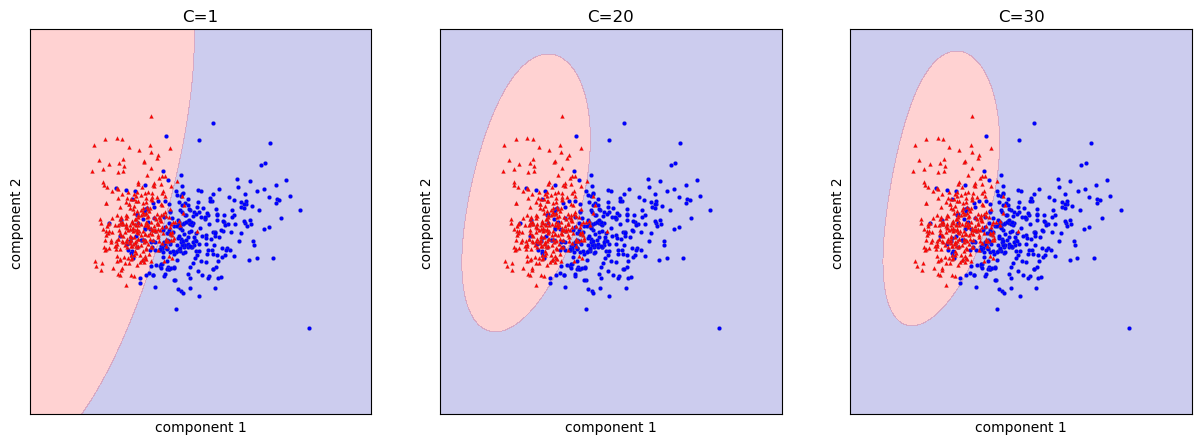

In [27]:
vsl_x = df_pca.to_numpy()
vsl_y = y_train["Class"].to_numpy()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# C값 1, 20, 30 에 따른 결정경계 시각화
for c_point, ax in zip([1, 20, 30], axes):
    c_svc_model = SVC(kernel="rbf", max_iter=1000, gamma=0.5, C=c_point)
    c_svc_model.fit(vsl_x, vsl_y)

    mglearn.plots.plot_2d_separator(
        c_svc_model, vsl_x, fill=True, eps=0.5, ax=ax, alpha=0.2
    )
    mglearn.discrete_scatter(
        vsl_x[:, 0], vsl_x[:, 1], vsl_y, markeredgewidth=0.1, c=["b", "r"], s=3, ax=ax
    )

    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title(f"C={c_point}")
plt.show()

In [30]:
# SVM gamma 값 0.1 ~ 20 에 따른 모델 성능 확인

scores = []
for gamm_point in [0.1, 0.5, 1, 5, 10, 20]:
    svc = SVC(kernel="rbf", C=10, gamma=gamm_point, max_iter=1000)
    svc.fit(scaled_train, y_train)
    train_score = svc.score(scaled_train, y_train)
    test_score = svc.score(scaled_test, y_test)
    print(
        f"rbf SVM : gamma = {gamm_point}, train set score : {train_score:.6f}, test set score : {test_score:.6f}"
    )
    scores.append([train_score, test_score])

rbf SVM : gamma = 0.1, train set score : 0.869841, test set score : 0.874074
rbf SVM : gamma = 0.5, train set score : 0.869841, test set score : 0.881481
rbf SVM : gamma = 1, train set score : 0.869841, test set score : 0.881481
rbf SVM : gamma = 5, train set score : 0.865079, test set score : 0.877778
rbf SVM : gamma = 10, train set score : 0.876190, test set score : 0.870370
rbf SVM : gamma = 20, train set score : 0.896825, test set score : 0.874074


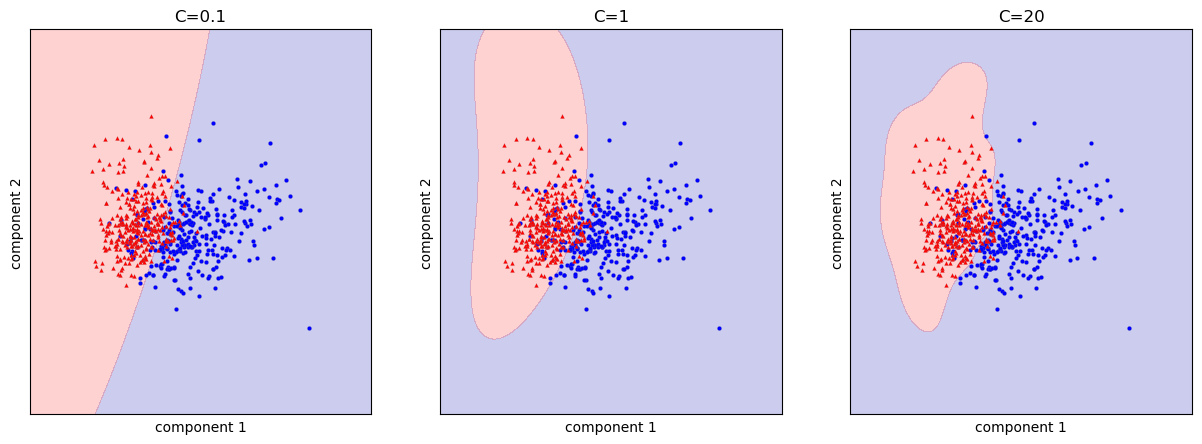

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# gamma값 0.1, 1, 20 에 따른 결정경계 시각화
for gamma_point, ax in zip([0.1, 1, 20], axes):
    g_svc_model = SVC(kernel="rbf", max_iter=1000, gamma=gamma_point, C=10)
    g_svc_model.fit(vsl_x, vsl_y)

    mglearn.plots.plot_2d_separator(
        g_svc_model, vsl_x, fill=True, eps=0.5, ax=ax, alpha=0.2
    )
    mglearn.discrete_scatter(
        vsl_x[:, 0], vsl_x[:, 1], vsl_y, markeredgewidth=0.1, c=["b", "r"], s=3, ax=ax
    )

    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title(f"C={gamma_point}")
plt.show()